## 量子信息转移
**从一个量子位到另一个量子位的状态转移**
* 在量子计算机中复制转移的操作，实际上是进行了隐形的观测，破坏了量子的叠加态，产生坍缩
* 利用量子纠缠的优势建立电路，也就是量子隐形传态电路
* 门电路相关知识见[这里](https://en.wikipedia.org/wiki/Quantum_logic_gate)

In [9]:
from qiskit import *

In [10]:
# 三个经典位、三个量子位
circuit = QuantumCircuit(3,3)

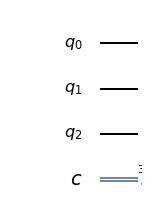

In [11]:
%matplotlib inline
circuit.draw(output='mpl')

下面吧q0的信息传到q2

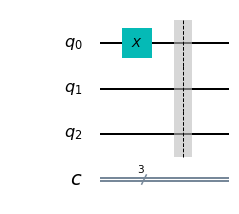

In [12]:
# x门相当于传统逻辑电路中的非门，针对单个量子位，实现0-1,1-0的转变
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

让q1和q2产生量子纠缠

In [13]:
# h门全称Hadamard gate，作用于一个量子位，这意味着度量将具有相等的概率成为1或0（即产生叠加）
circuit.h(1)
# 构建两量子位操作controlled X，类似于if,else，量子位1是条件
circuit.cx(1,2)

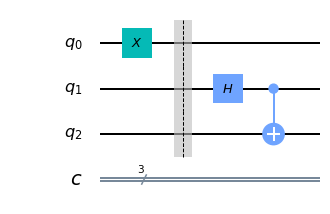

In [14]:
circuit.draw(output='mpl')

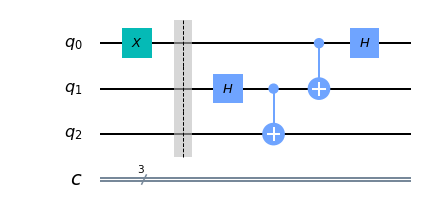

In [15]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

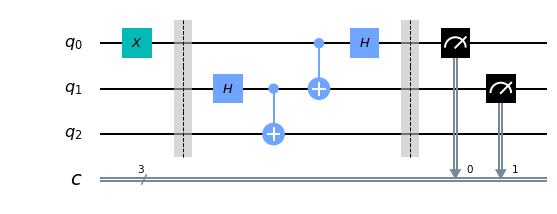

In [16]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

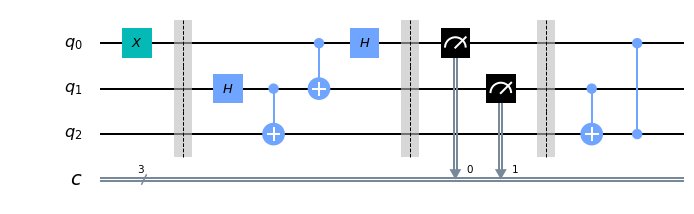

In [17]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

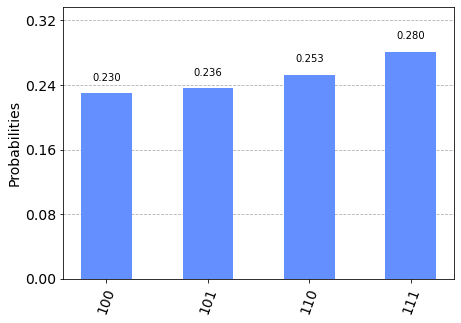

In [18]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
# 1024次快照
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

从上图可以得出，q2的观测值始终保持是1，这是将q0取非后的结果传给q2的效果。